<a href="https://colab.research.google.com/github/AmiMunshi/MachineLearningNew/blob/main/expt3_HypothesisTestingSimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [117]:
df= pd.read_excel("/content/IncomeSatisfaction.xlsx") #read the csv file

In [118]:
df.axes #ascertain the column names

[RangeIndex(start=0, stop=41, step=1),
 Index(['Income', 'LifeSatisfaction'], dtype='object')]

In [119]:
print(df) #print the dataframe to inspect its values
#We observe that there is ".." string at many places in Income column
#We need to either remove or replace this string value

    Income  LifeSatisfaction
0   427064               7.3
1   308325               7.1
2   386006               6.9
3   423849               7.4
4   100967               6.5
5       ..               6.3
6       ..               6.7
7   118637               7.6
8   159373               5.7
9   200827               7.6
10  280653               6.5
11  259667               7.0
12  150134               5.4
13  104458               5.6
14      ..               7.5
15  217130               7.0
16      ..               7.2
17  279889               6.0
18  305878               5.9
19  285980               5.9
20   70160               5.9
21      ..               5.9
22  769053               6.9
23      ..               6.5
24  157824               7.4
25  388514               7.3
26  228936               7.6
27  210991               6.1
28  232666               5.4
29  119696               6.2
30  203044               5.9
31  373548               6.3
32      ..               7.3
33      ..    

In [122]:
avgIncome=df[df["Income"] != ".."].mean() #Obtain the average of Income where Income is not the string ".."

In [123]:
print(avgIncome) #Print the average LifeSatisfaction and Income

Income              288004.724138
LifeSatisfaction         6.572414
dtype: float64


In [124]:
type(avgIncome) #Ascertain type of avgIncome

pandas.core.series.Series

In [125]:
df["Income"]= df["Income"].replace("..", avgIncome[0]) #replace string ".." from Income column with the average income

In [126]:
df #print df to observe that the string has been replaced by the average value

,Income,LifeSatisfaction
0,427064.000000,7.3
1,308325.000000,7.1
2,386006.000000,6.9
3,423849.000000,7.4
4,100967.000000,6.5
5,288004.724138,6.3
6,288004.724138,6.7
7,118637.000000,7.6
8,159373.000000,5.7
9,200827.000000,7.6


Using LinearRegression from sklearn to obtain the regression line and r_squared value

In [128]:
#Assign variables to Income and LifeSatisfaction columns
x=df[["Income"]]
y=df[["LifeSatisfaction"]]

In [130]:
#Develop a linear regression model. We have named this model as "model"
model= LinearRegression()
model.fit(x,y) #Fit the model to our data

LinearRegression()

In [131]:
#Obtain the r_squared value
print("r_squared value is ", model.score(x,y))

r_squared value is  0.057582775796690466


In [134]:
#Obtain the intercept and the coefficient
b0= model.intercept_
b1= model.coef_
print(" Equation of the regression line is y_est= {} + {}*x".format(b0,b1))

 Equation of the regression line is y_est= [6.16085137] + [[1.29614185e-06]]*x


In [135]:
#Obtain the estimated value of y using the regression model
yEst= model.predict(x)

Text(0, 0.5, 'Life satisfaction value')

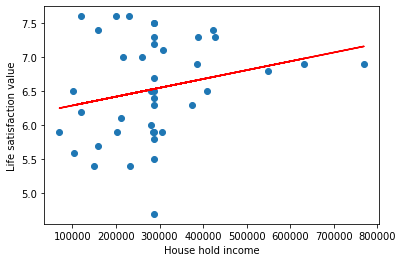

In [137]:
#Plot the actual data x vs y using scatter plot
#Plot the prediction line using x, yEst value
plt.scatter(x,y)
plt.plot(x,yEst,"r")
plt.xlabel("House hold income")
plt.ylabel("Life satisfaction value")

Using statsmodels module

REF: 

https://www.statsmodels.org/stable/index.html

https://mode.com/python-tutorial/libraries/statsmodels/

In [146]:
x = sm.add_constant(x) #This is the intercept that has to be added to create the model

In [147]:
modelNew = sm.OLS(y, x) # create the model
fitted = modelNew.fit() #fit the model

In [148]:
fitted.summary() #Obtain the results of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       LifeSatisfaction   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.383
Date:                Thu, 23 Dec 2021   Prob (F-statistic):              0.131
Time:                        05:34:32   Log-Likelihood:                -44.266
No. Observations:                  41   AIC:                             92.53
Df Residuals:                      39   BIC:                             95.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1609      0.267     23.042      0.000       5.620       6.702
Income      1.296e-06    8.4e-07      1.544      0.131   -4.02e-07    2.99e-06
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.465
Skew:                          -0.097   Prob(JB):                        0.792
Kurtosis:                       2.516   Cond. No.                     7.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
fitted.ssr #Method to obtain SSR

20.801216858903086

To find SSE, SSR and SST

In [157]:
#calculate sse
sse = np.sum((fitted.fittedvalues - df.LifeSatisfaction)**2)
print("SSE =", sse)


#calculate ssr
ssr = np.sum((fitted.fittedvalues - df.LifeSatisfaction.mean())**2)
print("SSR = ", ssr)



#calculate sst
sst = ssr + sse
print("SST = ", sst)

SSE = 20.801216858903086
SSR =  1.270978263048116
SST =  22.0721951219512
